# Exploración de Datos

Resumen:
En este notebook se realizará la exploración de datos para encontrar posibles patrones desde donde podeamos crear una solución

1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2. Lectura de datos

In [2]:
df = pd.read_excel('../data/ConsumptionPrediction_Dataset_v1.xlsx', sheet_name='Sheet1')
df.head()

,Flight_ID,Origin,Date,Flight_Type,Service_Type,Passenger_Count,Product_ID,Product_Name,Standard_Specification_Qty,Quantity_Returned,Quantity_Consumed,Unit_Cost,Crew_Feedback
0,AM109,DOH,2025-09-26,medium-haul,Retail,272,BRD001,Bread Roll Pack,62,7,55,0.35,NaN
1,AM109,DOH,2025-09-26,medium-haul,Retail,272,CRK075,Butter Cookies 75g,74,14,60,0.75,NaN
2,AM109,DOH,2025-09-26,medium-haul,Retail,272,DRK023,Sparkling Water 330ml,125,30,95,0.45,NaN
3,AM109,DOH,2025-09-26,medium-haul,Retail,272,DRK024,Still Water 500ml,110,19,91,0.50,NaN
4,LX110,DOH,2025-09-26,medium-haul,Pick & Pack,272,BRD001,Bread Roll Pack,177,58,119,0.35,NaN


## Visualización de los datos

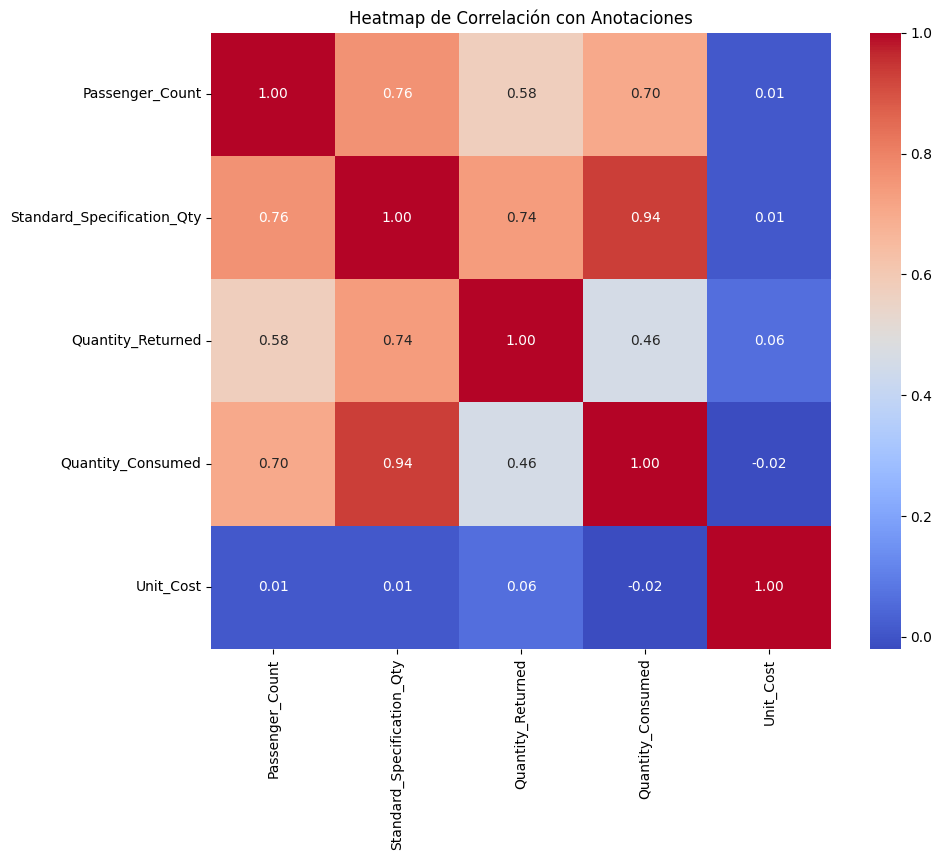

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tu matriz de correlación (sin cambios)
correlation_matrix = df.corr(numeric_only=True)

# Crea la figura (sin cambios)
plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix, 
    annot=True,     # Muestra los números dentro de las celdas
    cmap='coolwarm',  # Un mapa de color mejor para correlación (rojo=positivo, azul=negativo)
    fmt='.2f'         # Formatea los números a 2 decimales
)

plt.title('Heatmap de Correlación con Anotaciones')
plt.show()

### 1. Comparación de cantidades consumidas y retornadas por tipo de servicio

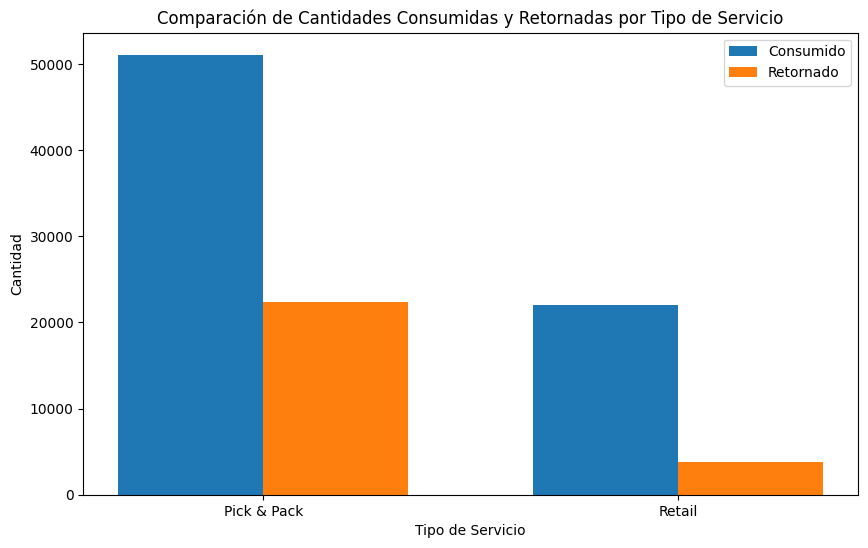

El % de productos retornados en el servicio Pick&Pack es mayor que en el servicio Retail.


In [3]:
# Gráfico que muestre el consumo entre categoria retail y Pick&Pack
df_category = df.groupby(['Service_Type']).sum().reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df_category['Service_Type']))

plt.bar(index - bar_width/2, df_category['Quantity_Consumed'], bar_width, label='Consumido')
plt.bar(index + bar_width/2, df_category['Quantity_Returned'], bar_width, label='Retornado')

plt.xlabel('Tipo de Servicio')
plt.ylabel('Cantidad')
plt.title('Comparación de Cantidades Consumidas y Retornadas por Tipo de Servicio')
plt.xticks(index, df_category['Service_Type'])
plt.legend()
plt.show()

print("El % de productos retornados en el servicio Pick&Pack es mayor que en el servicio Retail.")

Este gráfico nos muestra cómo el método Pick & Pack tiene un mayor consumo de productos, pero al mismo tiempo también un mayor nivel de retorno tanto numéricamente como porcentualmente, por lo que debemos concentrarnos en bajar lo más posible el retorno de pick and pack

### 2. Varianza de Pick and Pack

C:\Users\Pansocrates03\AppData\Local\Temp\ipykernel_13780\2269401397.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[


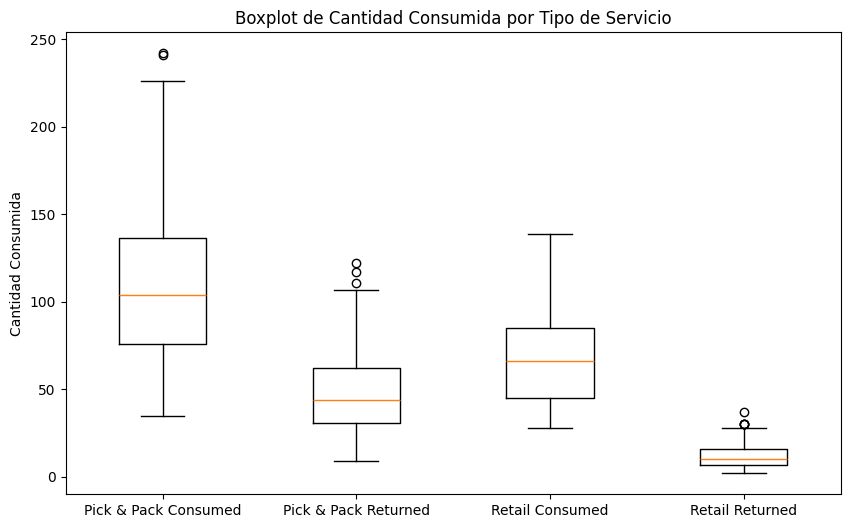

La varianza de la cantidad consumida en el servicio Pick&Pack es: 1859.0108812528147
La varianza de la cantidad consumida en el servicio Retail es: 626.8277872744538


In [4]:
# Varianza de tipo de servicio Pick&Pack

# Boxplot de Pick&Pack con respecto a la cantidad consumida y mostrar ambos boxplots
plt.figure(figsize=(10, 6))
data_to_plot = [
    df[df['Service_Type'] == 'Pick & Pack']['Quantity_Consumed'],
    df[df['Service_Type'] == 'Pick & Pack']['Quantity_Returned'],
    df[df['Service_Type'] == 'Retail']['Quantity_Consumed'],
    df[df['Service_Type'] == 'Retail']['Quantity_Returned']
]
plt.boxplot(data_to_plot, labels=[
    'Pick & Pack Consumed', 'Pick & Pack Returned', 'Retail Consumed', 'Retail Returned'
    ])
plt.ylabel('Cantidad Consumida')
plt.title('Boxplot de Cantidad Consumida por Tipo de Servicio')
plt.show()

# Obtener el subset de datos para el servicio Pick&Pack
df_pickpack = df[df['Service_Type'] == 'Pick & Pack']
variance_pickpack = df_pickpack['Quantity_Consumed'].var()
print(f'La varianza de la cantidad consumida en el servicio Pick&Pack es: {variance_pickpack}')
variance_retail = df[df['Service_Type'] == 'Retail']['Quantity_Consumed'].var()
print(f'La varianza de la cantidad consumida en el servicio Retail es: {variance_retail}')



Tomando esto en cuenta, a partir de ahora nos enfocaremos únicamente el el tipo Pick&Pack, ya que del retail casi no hay productos devueltos.

In [7]:
df = df[df['Service_Type'] == 'Pick & Pack']
df.head()

,Flight_ID,Origin,Date,Flight_Type,Service_Type,Passenger_Count,Product_ID,Product_Name,Standard_Specification_Qty,Quantity_Returned,Quantity_Consumed,Unit_Cost,Crew_Feedback
4,LX110,DOH,2025-09-26,medium-haul,Pick & Pack,272,BRD001,Bread Roll Pack,177,58,119,0.35,NaN
5,LX110,DOH,2025-09-26,medium-haul,Pick & Pack,272,CHO050,Chocolate Bar 50g,147,48,99,0.80,NaN
6,LX110,DOH,2025-09-26,medium-haul,Pick & Pack,272,CRK075,Butter Cookies 75g,131,36,95,0.75,drawer incomplete
7,LX110,DOH,2025-09-26,medium-haul,Pick & Pack,272,DRK023,Sparkling Water 330ml,205,37,168,0.45,NaN
8,LX110,DOH,2025-09-26,medium-haul,Pick & Pack,272,DRK024,Still Water 500ml,197,95,102,0.50,NaN


### Cantidad retornada por producto

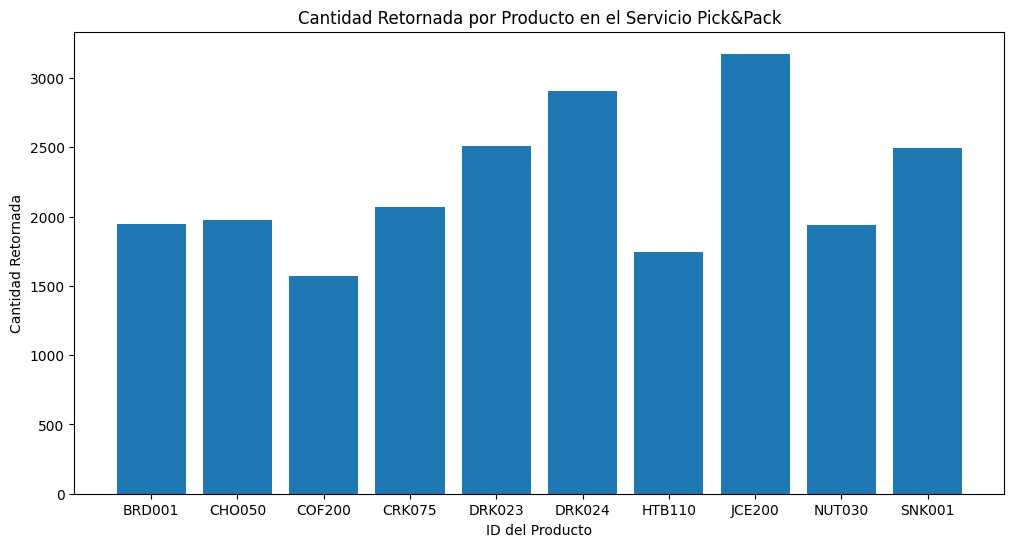

Los productos más retornados son:
  Product_ID           Product_Name  Quantity_Returned
7     JCE200            Juice 200ml               3176
5     DRK024      Still Water 500ml               2909
4     DRK023  Sparkling Water 330ml               2509
9     SNK001      Snack Box Economy               2499
3     CRK075     Butter Cookies 75g               2070


In [16]:
# 1. Agrupar, sumar 'Quantity_Returned' y obtener el 'first' nombre del producto
df_product_returns = df.groupby('Product_ID').agg({
    'Quantity_Returned': 'sum',
    'Product_Name': 'first'  # Usa 'first' (primero), 'max', o 'min' para quedarte con un valor único de texto.
}).reset_index()

# 2. Generación del gráfico (sin cambios)
plt.figure(figsize=(12, 6))
plt.bar(df_product_returns['Product_ID'], df_product_returns['Quantity_Returned'])
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad Retornada')
plt.title('Cantidad Retornada por Producto en el Servicio Pick&Pack')
plt.show()

# 3. Impresión de los productos más retornados (ahora con el Product_Name correcto)
print("Los productos más retornados son:")
top_returned_products = df_product_returns.sort_values(by='Quantity_Returned', ascending=False).head(5)
print(top_returned_products[['Product_ID', 'Product_Name', 'Quantity_Returned']])

### Cantidad retornada por vuelo

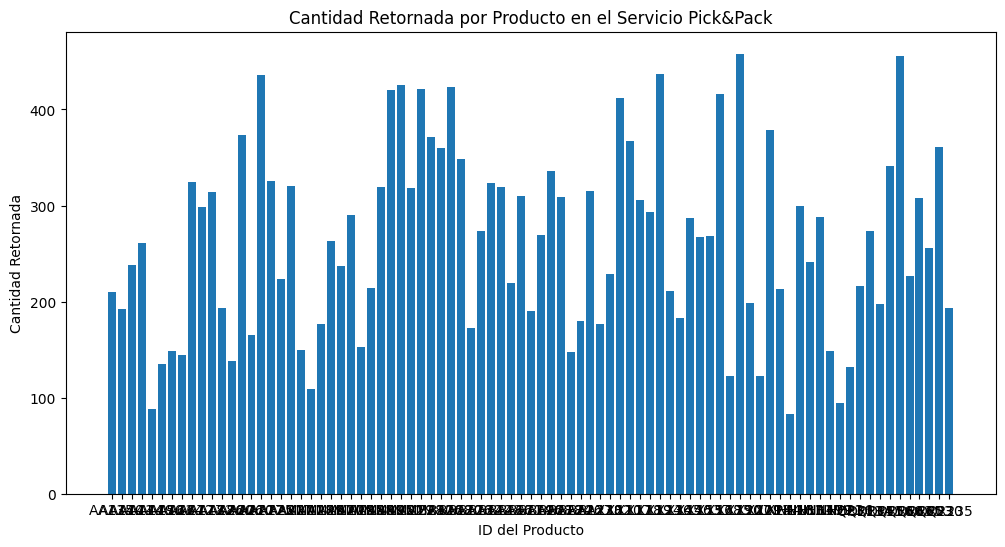

Los productos más retornados son:
   Flight_ID Origin  Quantity_Returned
63     LX190    JFK                458
79     QR160    MEX                456
55     LX124    MEX                437
15     AA217    DOH                436
29     AM202    JFK                425
34     BA108    NRT                423
31     AM228    NRT                421
28     AM195    MEX                420
61     LX168    NRT                416
51     LX110    DOH                412
66     LX213    JFK                379
13     AA206    DOH                373
32     AM232    MEX                371
52     LX117    JFK                367
83     QR230    DOH                361
Promedio de retornados por vuelo: 262.94117647058823


In [28]:
# Hacer un df agrupado por Flight_ID y el numero de productos retornados por cada producto

# 1. Agrupar, sumar 'Quantity_Returned' y obtener el 'first' nombre del producto
df_product_returns = df.groupby('Flight_ID').agg({
    'Quantity_Returned': 'sum',
    'Origin': 'first'  # Usa 'first' (primero), 'max', o 'min' para quedarte con un valor único de texto.
}).reset_index()

# 2. Generación del gráfico (sin cambios)
plt.figure(figsize=(12, 6))
plt.bar(df_product_returns['Flight_ID'], df_product_returns['Quantity_Returned'])
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad Retornada')
plt.title('Cantidad Retornada por Producto en el Servicio Pick&Pack')
plt.show()

# 3. Impresión de los productos más retornados (ahora con el Product_Name correcto)
print("Los productos más retornados son:")
top_returned_products = df_product_returns.sort_values(by='Quantity_Returned', ascending=False).head(15)
print(top_returned_products[['Flight_ID', 'Origin', 'Quantity_Returned']])

print("Promedio de retornados por vuelo:", df_product_returns['Quantity_Returned'].mean())